### Data Dictionary

The goal of this exercise is to do Model Development and Validation to find the answer to the Question 4 of the problem statement:

Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

Using the best model, you need to predict the number of future complaints (of the Complaint Type that you decided to focus on in Question 1).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("partfour.csv")

In [3]:
df

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,Age
0,122 BRUCKNER BOULEVARD,2340,46.0,0.90,5.0,6.5,1,15000,200.0,1,2.0,2628,2000,6.02,2458,1935,2000,10454,65
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,2000,6.02,2458,1931,1994,10454,63
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,2628,2000,6.02,2458,1931,2000,10454,69
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,2628,12500,6.02,2458,1931,2001,10454,70
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,2628,6876,6.02,1719,1920,2009,10454,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,GOLD STREET,2340,46.0,0.90,2.0,2.0,100,2513,100.0,1,2.0,2628,2000,1.25,2458,1935,2000,10465,65
89850,GOLD STREET,2340,46.0,0.90,3.4,6.5,150,2513,100.0,1,2.0,2628,2000,6.02,2458,1935,2000,10465,65
89851,GOLD STREET,2340,46.0,0.90,2.0,2.0,200,2513,100.0,1,2.0,2628,2000,1.25,2458,1935,2000,10465,65
89852,GOLD STREET,2340,46.0,0.90,2.0,2.0,8900,2513,100.0,1,2.0,2628,2000,1.25,2458,1935,2000,10465,65


In [4]:
df.isnull().sum()

Address       0
BldgArea      0
BldgDepth     0
BuiltFAR      0
CommFAR       0
FacilFAR      0
Lot           0
LotArea       0
LotDepth      0
NumBldgs      0
NumFloors     0
OfficeArea    0
ResArea       0
ResidFAR      0
RetailArea    0
YearBuilt     0
YearAlter1    0
ZipCode       0
Age           0
dtype: int64

In [5]:
df['Period'] = 2020 - df['YearBuilt']

In [6]:
df

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,Age,Period
0,122 BRUCKNER BOULEVARD,2340,46.0,0.90,5.0,6.5,1,15000,200.0,1,2.0,2628,2000,6.02,2458,1935,2000,10454,65,85
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,2000,6.02,2458,1931,1994,10454,63,89
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,2628,2000,6.02,2458,1931,2000,10454,69,89
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,2628,12500,6.02,2458,1931,2001,10454,70,89
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,2628,6876,6.02,1719,1920,2009,10454,89,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89849,GOLD STREET,2340,46.0,0.90,2.0,2.0,100,2513,100.0,1,2.0,2628,2000,1.25,2458,1935,2000,10465,65,85
89850,GOLD STREET,2340,46.0,0.90,3.4,6.5,150,2513,100.0,1,2.0,2628,2000,6.02,2458,1935,2000,10465,65,85
89851,GOLD STREET,2340,46.0,0.90,2.0,2.0,200,2513,100.0,1,2.0,2628,2000,1.25,2458,1935,2000,10465,65,85
89852,GOLD STREET,2340,46.0,0.90,2.0,2.0,8900,2513,100.0,1,2.0,2628,2000,1.25,2458,1935,2000,10465,65,85


In [7]:
#df.to_csv("partfive.csv",index=False)

In [8]:
df.columns

Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'Age', 'Period'],
      dtype='object')

In [9]:
df.drop(['Address','YearBuilt', 'YearAlter1','ZipCode'],axis=1,inplace=True)

In [10]:
df.shape

(89854, 16)

In [11]:
df2 = df.sample(n=1000,random_state=0)

In [12]:
df2

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
61917,1268,35.0,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70
26262,19125,45.0,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103
28925,1910,30.0,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14
85749,1968,40.0,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95
80012,924,30.0,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15631,1240,40.0,0.99,2.0,4.8,102,1250,75.00,1,2.00,2628,1240,3.44,2458,80,100
58252,1890,32.0,0.97,2.0,2.0,25,1953,108.50,1,2.00,2628,1296,0.90,2458,50,70
87204,2340,46.0,0.90,1.0,2.4,401,372453,560.08,9,2.00,2628,2000,1.25,2458,65,85
28524,1060,38.0,0.21,2.0,1.0,52,5000,100.00,1,1.50,2628,1060,0.60,2458,75,95


In [13]:
scaler = StandardScaler()

In [14]:
X = df2

In [15]:
X

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
61917,1268,35.0,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70
26262,19125,45.0,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103
28925,1910,30.0,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14
85749,1968,40.0,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95
80012,924,30.0,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15631,1240,40.0,0.99,2.0,4.8,102,1250,75.00,1,2.00,2628,1240,3.44,2458,80,100
58252,1890,32.0,0.97,2.0,2.0,25,1953,108.50,1,2.00,2628,1296,0.90,2458,50,70
87204,2340,46.0,0.90,1.0,2.4,401,372453,560.08,9,2.00,2628,2000,1.25,2458,65,85
28524,1060,38.0,0.21,2.0,1.0,52,5000,100.00,1,1.50,2628,1060,0.60,2458,75,95


In [16]:
X.values

array([[ 1.2680e+03,  3.5000e+01,  3.5000e-01, ...,  2.4580e+03,
         5.0000e+01,  7.0000e+01],
       [ 1.9125e+04,  4.5000e+01,  4.4700e+00, ...,  2.4580e+03,
         8.3000e+01,  1.0300e+02],
       [ 1.9100e+03,  3.0000e+01,  6.5000e-01, ...,  2.4580e+03,
        -6.0000e+00,  1.4000e+01],
       ...,
       [ 2.3400e+03,  4.6000e+01,  9.0000e-01, ...,  2.4580e+03,
         6.5000e+01,  8.5000e+01],
       [ 1.0600e+03,  3.8000e+01,  2.1000e-01, ...,  2.4580e+03,
         7.5000e+01,  9.5000e+01],
       [ 3.0660e+03,  5.2000e+01,  1.5300e+00, ...,  2.4580e+03,
         1.0100e+02,  1.2100e+02]])

In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[-0.27396571, -0.60368909, -0.84549246, ..., -0.05907152,
        -0.23877538, -0.24710171],
       [ 0.57511802, -0.23809698,  3.37030477, ..., -0.05907152,
         0.8708694 ,  0.87223342],
       [-0.2434392 , -0.78648515, -0.53851693, ..., -0.05907152,
        -2.12180895, -2.1465795 ],
       ...,
       [-0.2229931 , -0.20153777, -0.28270399, ..., -0.05907152,
         0.26560861,  0.26168699],
       [-0.28385591, -0.49401146, -0.98874771, ..., -0.05907152,
         0.6018646 ,  0.60087945],
       [-0.18847248,  0.0178175 ,  0.36194461, ..., -0.05907152,
         1.47613019,  1.48277985]])

### Use Dendogram

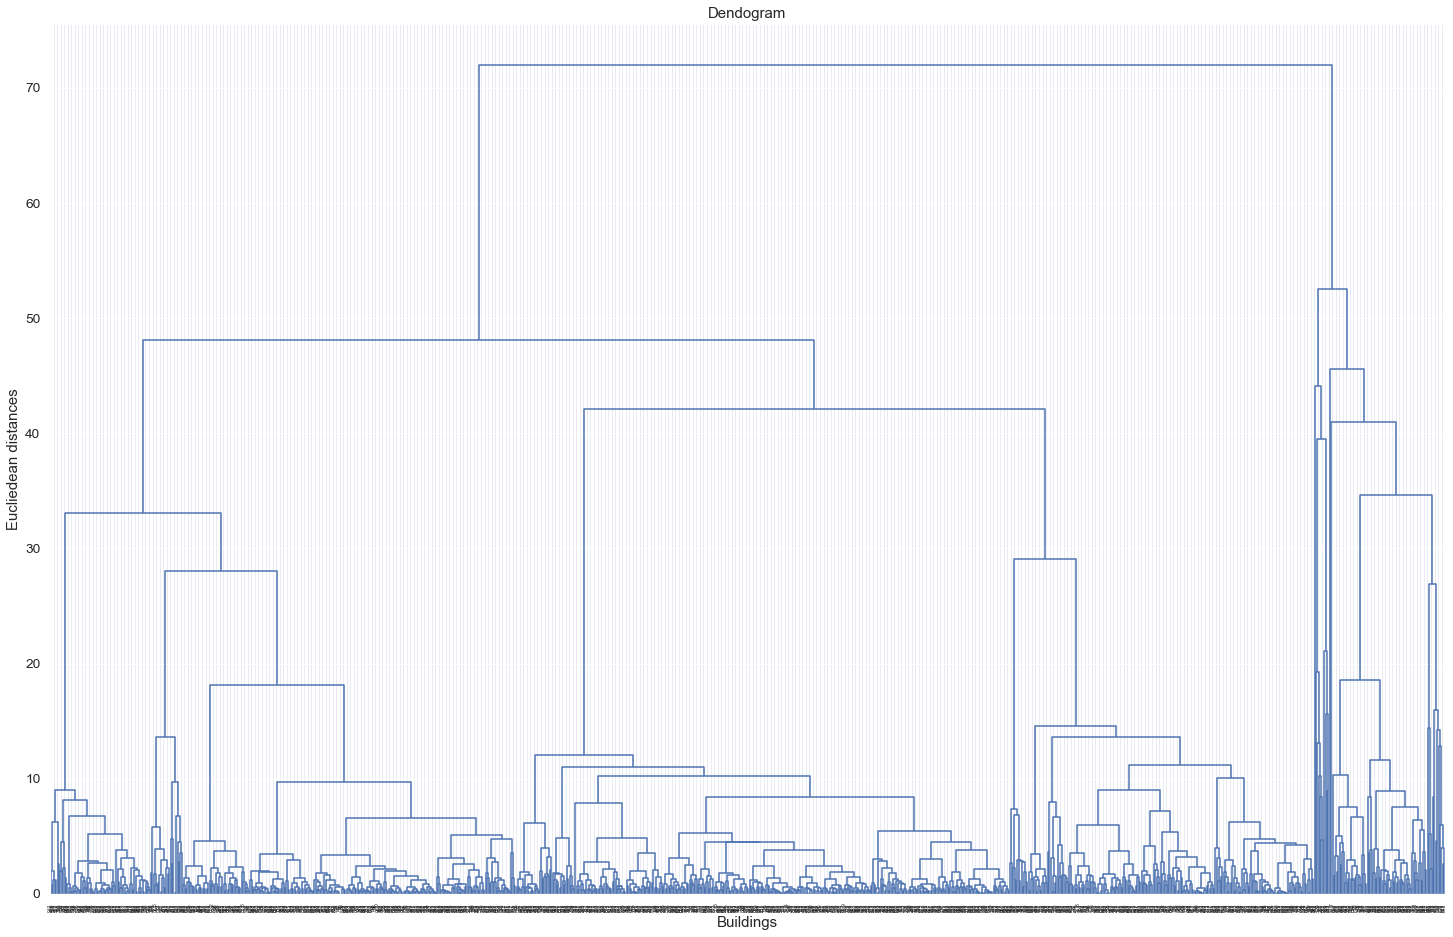

In [19]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'),truncate_mode='level',color_threshold=0)
plt.title("Dendogram")
plt.xlabel("Buildings")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [20]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [21]:
y_hc = hc.fit_predict(X_scaled)

In [22]:
y_hc

array([3, 0, 3, 1, 1, 3, 3, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 0, 2, 1, 1, 3, 3,
       1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3,
       1, 3, 1, 1, 3, 0, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1,
       3, 1, 0, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2,
       0, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       0, 3, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 0,
       3, 0, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 3,
       1, 1, 1, 1, 0, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3,
       1, 1, 0, 3, 1, 0, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3,

In [23]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [24]:
y

,Cluster
0,3
1,0
2,3
3,1
4,1
...,...
995,1
996,3
997,0
998,1


In [25]:
y['Cluster'].unique()

array([3, 0, 1, 2], dtype=int64)

In [26]:
y['Cluster'].value_counts()

1    572
3    334
0     83
2     11
Name: Cluster, dtype: int64

In [27]:
df2.reset_index(drop=True,inplace=True)

In [28]:
df2

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
0,1268,35.0,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70
1,19125,45.0,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103
2,1910,30.0,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14
3,1968,40.0,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95
4,924,30.0,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1240,40.0,0.99,2.0,4.8,102,1250,75.00,1,2.00,2628,1240,3.44,2458,80,100
996,1890,32.0,0.97,2.0,2.0,25,1953,108.50,1,2.00,2628,1296,0.90,2458,50,70
997,2340,46.0,0.90,1.0,2.4,401,372453,560.08,9,2.00,2628,2000,1.25,2458,65,85
998,1060,38.0,0.21,2.0,1.0,52,5000,100.00,1,1.50,2628,1060,0.60,2458,75,95


In [29]:
newdf = pd.concat([df2,y],axis=1)

In [30]:
newdf

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Cluster
0,1268,35.0,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70,3
1,19125,45.0,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103,0
2,1910,30.0,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14,3
3,1968,40.0,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95,1
4,924,30.0,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1240,40.0,0.99,2.0,4.8,102,1250,75.00,1,2.00,2628,1240,3.44,2458,80,100,1
996,1890,32.0,0.97,2.0,2.0,25,1953,108.50,1,2.00,2628,1296,0.90,2458,50,70,3
997,2340,46.0,0.90,1.0,2.4,401,372453,560.08,9,2.00,2628,2000,1.25,2458,65,85,0
998,1060,38.0,0.21,2.0,1.0,52,5000,100.00,1,1.50,2628,1060,0.60,2458,75,95,1


In [31]:
meandf = newdf.groupby(by='Cluster').mean()

In [32]:
meandf

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
Cluster,,,,,,,,,,,,,,,,
0,35673.518072,98.171566,3.595301,1.962651,4.546988,55.301205,20321.481928,136.975663,1.192771,4.831325,4541.337349,28061.481928,3.148072,4052.132530,66.289157,88.915663
1,2769.449301,47.993042,0.922867,2.035664,2.933392,86.814685,3666.059441,98.565297,1.309441,2.120647,2609.246503,2218.152098,1.750105,2495.921329,74.416084,94.309441
2,131125.181818,79.121818,2.323636,1.990909,4.881818,4797.909091,115340.000000,223.770000,10.272727,7.454545,2461.363636,97581.818182,3.240000,3723.818182,9.636364,26.909091
3,3120.787425,45.036048,0.971347,1.923653,2.529042,69.970060,3694.811377,100.551168,1.062874,2.260988,2610.661677,2131.365269,1.470269,2487.565868,26.727545,46.898204


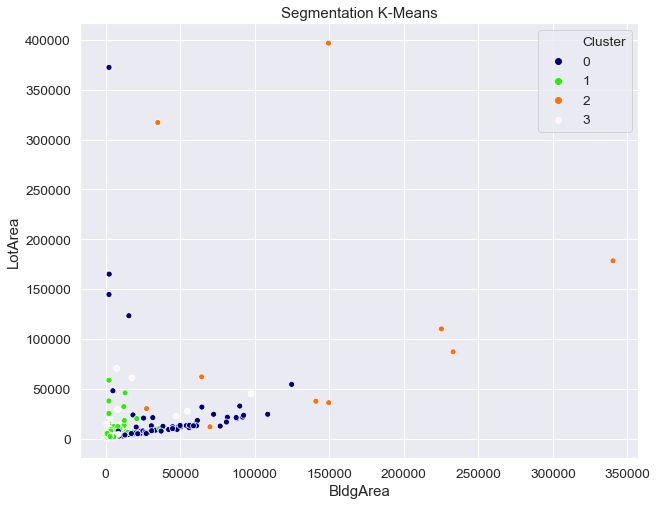

In [33]:
x_axis = newdf['BldgArea']
y_axis = newdf['LotArea']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='gist_ncar')
plt.title('Segmentation K-Means')
plt.show()

In [34]:
df3 = df.sample(n=30000,random_state=0)

In [35]:
df3

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
61917,1268,35.00,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70
26262,19125,45.00,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103
28925,1910,30.00,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14
85749,1968,40.00,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95
80012,924,30.00,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29655,3432,52.00,1.44,2.0,2.0,8,2380,108.33,1,3.00,2628,3432,1.25,2458,12,32
24842,2340,46.00,0.90,2.0,6.5,38,3180,127.20,1,2.00,2628,2000,6.02,2458,65,85
53603,127566,82.67,1.91,2.0,4.8,12,66750,200.00,2,6.00,2628,127566,2.43,2458,72,92
12001,2340,46.00,0.90,2.0,2.0,62,13625,109.00,1,2.00,2628,2000,1.25,2458,65,85


In [36]:
df3.reset_index(drop=True,inplace=True)

In [37]:
df3

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
0,1268,35.00,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70
1,19125,45.00,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103
2,1910,30.00,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14
3,1968,40.00,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95
4,924,30.00,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3432,52.00,1.44,2.0,2.0,8,2380,108.33,1,3.00,2628,3432,1.25,2458,12,32
29996,2340,46.00,0.90,2.0,6.5,38,3180,127.20,1,2.00,2628,2000,6.02,2458,65,85
29997,127566,82.67,1.91,2.0,4.8,12,66750,200.00,2,6.00,2628,127566,2.43,2458,72,92
29998,2340,46.00,0.90,2.0,2.0,62,13625,109.00,1,2.00,2628,2000,1.25,2458,65,85


In [38]:
df3_scaled = scaler.fit_transform(df3)

In [39]:
df3_scaled

array([[-0.07855021, -0.56800114, -0.45484587, ..., -0.04026808,
        -0.2489177 , -0.25504032],
       [ 0.11159222, -0.22517615,  1.82479579, ..., -0.04026808,
         0.90049051,  0.89540219],
       [-0.07171416, -0.73941363, -0.28885255, ..., -0.04026808,
        -2.1994286 , -2.2073064 ],
       ...,
       [ 1.26627863,  1.06624559,  0.40831942, ..., -0.04026808,
         0.51735444,  0.51192135],
       [-0.06713549, -0.19089365, -0.15052478, ..., -0.04026808,
         0.27354058,  0.26788809],
       [-0.08182981, -0.73941363, -0.2667201 , ..., -0.04026808,
         0.09938782,  0.09357862]])

### K-Means Clustering

In [40]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df3_scaled)
    wcss.append(kmeans.inertia_)

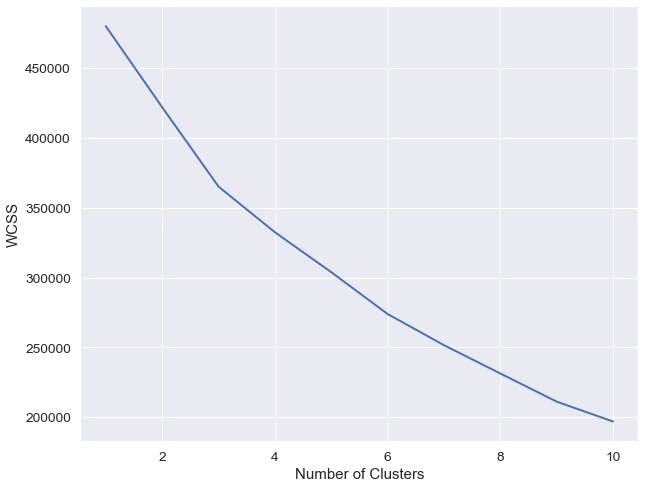

In [41]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [42]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [43]:
kmeans.fit(df3_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [44]:
df_segm_kmeans = df3.copy()

In [45]:
df_segm_kmeans

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
0,1268,35.00,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70
1,19125,45.00,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103
2,1910,30.00,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14
3,1968,40.00,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95
4,924,30.00,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3432,52.00,1.44,2.0,2.0,8,2380,108.33,1,3.00,2628,3432,1.25,2458,12,32
29996,2340,46.00,0.90,2.0,6.5,38,3180,127.20,1,2.00,2628,2000,6.02,2458,65,85
29997,127566,82.67,1.91,2.0,4.8,12,66750,200.00,2,6.00,2628,127566,2.43,2458,72,92
29998,2340,46.00,0.90,2.0,2.0,62,13625,109.00,1,2.00,2628,2000,1.25,2458,65,85


In [46]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [47]:
df_segm_kmeans

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Segment K-Means
0,1268,35.00,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70,0
1,19125,45.00,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103,2
2,1910,30.00,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14,0
3,1968,40.00,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95,0
4,924,30.00,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3432,52.00,1.44,2.0,2.0,8,2380,108.33,1,3.00,2628,3432,1.25,2458,12,32,0
29996,2340,46.00,0.90,2.0,6.5,38,3180,127.20,1,2.00,2628,2000,6.02,2458,65,85,2
29997,127566,82.67,1.91,2.0,4.8,12,66750,200.00,2,6.00,2628,127566,2.43,2458,72,92,2
29998,2340,46.00,0.90,2.0,2.0,62,13625,109.00,1,2.00,2628,2000,1.25,2458,65,85,0


In [48]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [49]:
df_segm_analysis

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
Segment K-Means,,,,,,,,,,,,,,,,
0,2.830058e+03,44.180635,0.824756,1.956601,1.827063,107.537999,9.858623e+03,104.375205,1.287439,2.079786,2665.877343,2.079413e+03,0.968763,2483.228046,56.532702,76.471985
1,1.354011e+07,408.000000,2.680000,2.000000,4.800000,120.000000,5.048550e+06,900.000000,251.000000,33.000000,28000.000000,1.321140e+07,2.430000,2458.000000,36.000000,51.000000
2,1.835137e+04,65.523815,1.829558,2.071313,4.869131,120.636828,1.283547e+04,110.425436,1.186553,3.057193,3710.230346,1.366173e+04,3.180507,2928.668274,58.310987,78.916080


In [50]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','BldgDepth']].groupby(['Segment K-Means']).count()

In [51]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [52]:
df_segm_analysis

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,,,,,,,,,
0,2.830058e+03,44.180635,0.824756,1.956601,1.827063,107.537999,9.858623e+03,104.375205,1.287439,2.079786,2665.877343,2.079413e+03,0.968763,2483.228046,56.532702,76.471985,19632,0.654400
1,1.354011e+07,408.000000,2.680000,2.000000,4.800000,120.000000,5.048550e+06,900.000000,251.000000,33.000000,28000.000000,1.321140e+07,2.430000,2458.000000,36.000000,51.000000,1,0.000033
2,1.835137e+04,65.523815,1.829558,2.071313,4.869131,120.636828,1.283547e+04,110.425436,1.186553,3.057193,3710.230346,1.366173e+04,3.180507,2928.668274,58.310987,78.916080,10367,0.345567


In [53]:
df_segm_analysis.rename({0: 'Large',
                         1: 'Odd',
                         2: 'Small',
                        },inplace=True)

In [54]:
df_segm_analysis

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,,,,,,,,,
Large,2.830058e+03,44.180635,0.824756,1.956601,1.827063,107.537999,9.858623e+03,104.375205,1.287439,2.079786,2665.877343,2.079413e+03,0.968763,2483.228046,56.532702,76.471985,19632,0.654400
Odd,1.354011e+07,408.000000,2.680000,2.000000,4.800000,120.000000,5.048550e+06,900.000000,251.000000,33.000000,28000.000000,1.321140e+07,2.430000,2458.000000,36.000000,51.000000,1,0.000033
Small,1.835137e+04,65.523815,1.829558,2.071313,4.869131,120.636828,1.283547e+04,110.425436,1.186553,3.057193,3710.230346,1.366173e+04,3.180507,2928.668274,58.310987,78.916080,10367,0.345567


In [55]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'Large',
                                                                  1: 'Odd',
                                                                  2: 'Small',
                                                                 })

In [56]:
df_segm_kmeans

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Segment K-Means,Labels
0,1268,35.00,0.35,2.0,2.0,42,3650,95.00,1,1.67,2628,1268,0.90,2458,50,70,0,Large
1,19125,45.00,4.47,2.0,3.0,80,4275,45.00,1,5.00,2628,19125,3.00,2458,83,103,2,Small
2,1910,30.00,0.65,2.0,1.0,24,2917,58.33,2,2.00,2628,1910,0.60,2458,-6,14,0,Large
3,1968,40.00,0.39,2.0,1.0,86,5000,100.00,2,2.50,2628,1968,0.60,2458,75,95,0,Large
4,924,30.00,0.51,2.0,2.0,18,1800,100.00,2,2.00,2628,924,0.90,2458,75,95,0,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3432,52.00,1.44,2.0,2.0,8,2380,108.33,1,3.00,2628,3432,1.25,2458,12,32,0,Large
29996,2340,46.00,0.90,2.0,6.5,38,3180,127.20,1,2.00,2628,2000,6.02,2458,65,85,2,Small
29997,127566,82.67,1.91,2.0,4.8,12,66750,200.00,2,6.00,2628,127566,2.43,2458,72,92,2,Small
29998,2340,46.00,0.90,2.0,2.0,62,13625,109.00,1,2.00,2628,2000,1.25,2458,65,85,0,Large


### Plot the clusters

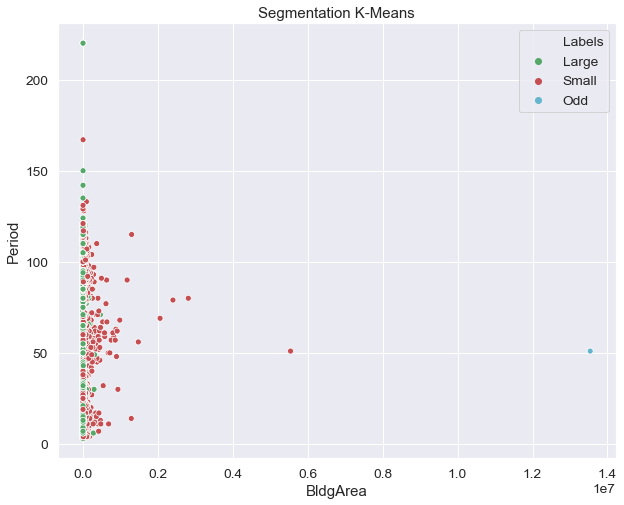

In [57]:
x_axis = df_segm_kmeans['BldgArea']
y_axis = df_segm_kmeans['Period']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c'])
plt.title('Segmentation K-Means')
plt.show()

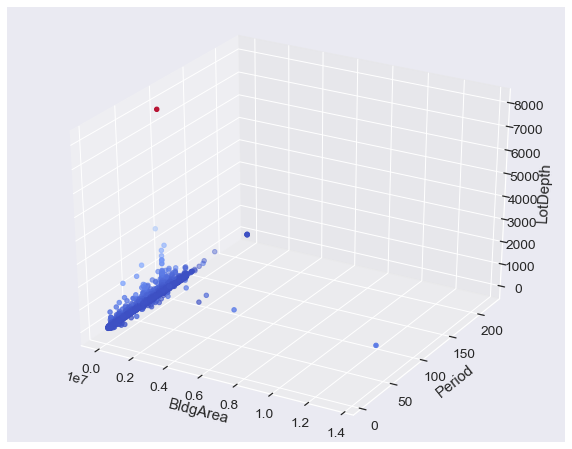

In [59]:
x_axis = df_segm_kmeans['BldgArea']
y_axis = df_segm_kmeans['Period']
z_axis = df_segm_kmeans['LotDepth']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='coolwarm')

ax.set_xlabel('BldgArea')
ax.set_ylabel('Period')
ax.set_zlabel('LotDepth')

plt.show()